In [1]:
import numpy as np
import os, time
import matplotlib.pyplot as plt
import galactic_wavelets as gw
import torch

In [2]:
N = 128
quijote_dir = '/mnt/ceph/users/fvillaescusa/Quijote/3D_cubes/'
test_df = quijote_dir+f'fiducial/0/df_m_{N}_CIC_z=0.npy'

device = 0

In [3]:
df = torch.from_numpy(np.load(os.path.join(quijote_dir, test_df))).to(device)
df_shape = df.shape
N = df_shape[0]
print("Shape of the density field: ", df_shape)
print("Min/max/mean of the density field: ", df.min(), df.max(), df.mean())

Shape of the density field:  torch.Size([128, 128, 128])
Min/max/mean of the density field:  tensor(-0.9404, device='cuda:0') tensor(56.0308, device='cuda:0') tensor(-3.4925e-10, device='cuda:0')


In [4]:
J = 6
Q = 1
kc = np.pi
erosion_threshold = 0.1

In [5]:
wt_op = gw.WaveletTransform3D((N, N, N),
                              J,
                              erosion_threshold=erosion_threshold,
                              device=device)

Computing wavelets...


Done!
Computing masks for the wavelet transform...
Done!


In [6]:
wt_df = wt_op(df)
print(wt_df.shape)

torch.Size([6, 1, 128, 128, 128])


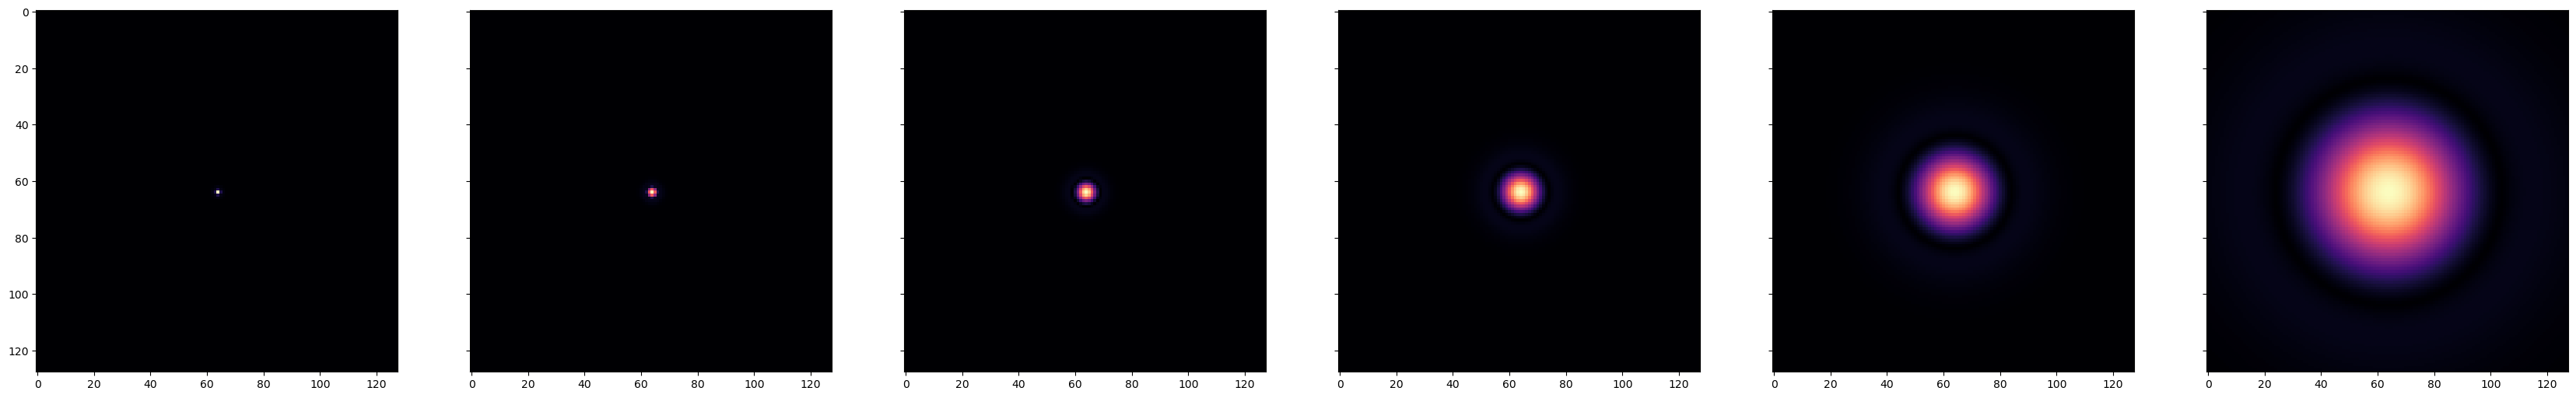

In [7]:
# Visualization of the wavelets
fig, axs = plt.subplots(1, J*Q, figsize=(7*(J*Q), 7), sharex=True, sharey=True)
for j in range(J*Q):
    axs[j].imshow(torch.fft.fftshift(torch.absolute(wt_op.get_wavelets("physical")[j, 0]).cpu())[N//2], cmap='magma')
plt.show()

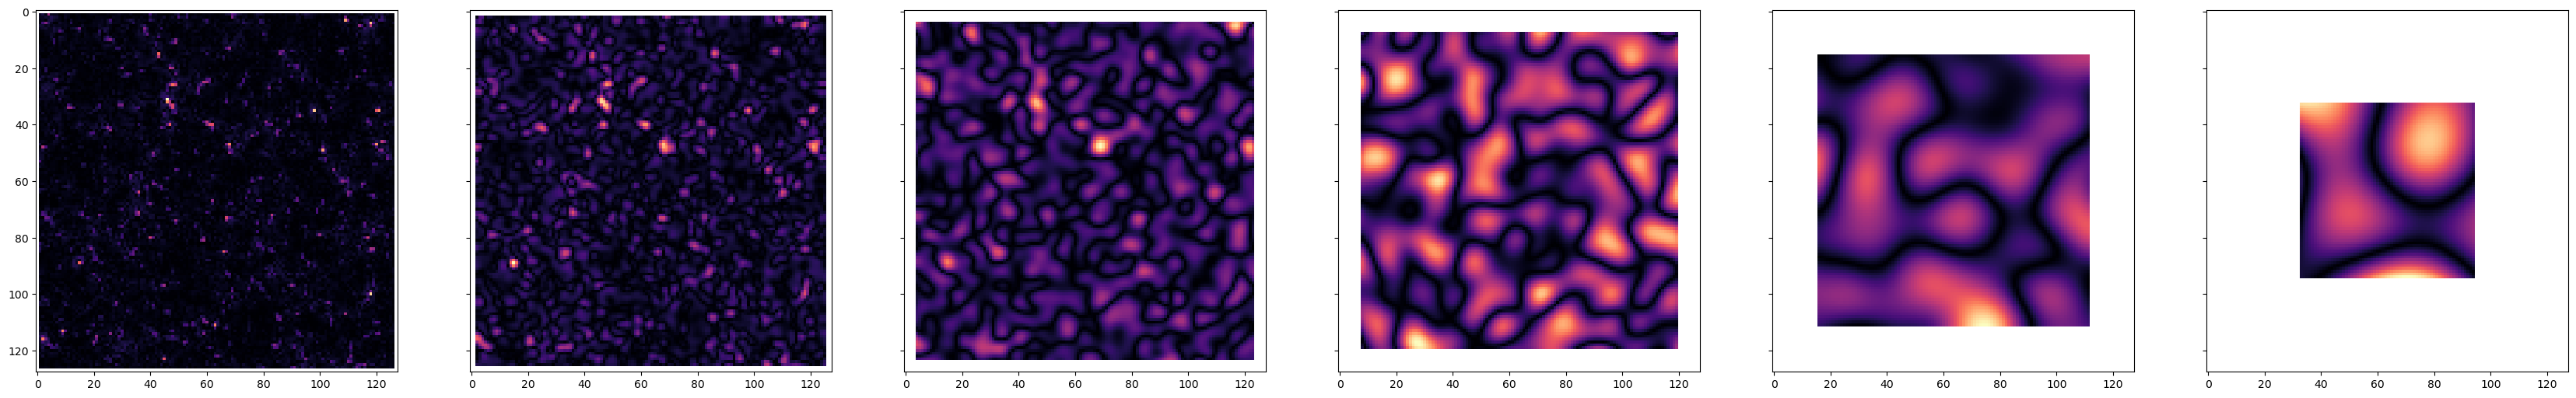

In [8]:
# Visualization of the wavelet transform
fig, axs = plt.subplots(1, J*Q, figsize=(7*(J*Q), 7), sharex=True, sharey=True)
for j in range(J*Q):
    axs[j].imshow(torch.absolute(wt_df[j, 0]).cpu()[N//2], cmap='magma')
plt.show()